# Predicting House Prices in King County with Linear Regression.

* Load libraries and modules.

In [49]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import cufflinks as cf

%matplotlib inline

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [51]:
sns.set_style('darkgrid')

In [52]:
sns.set_palette('viridis')

* Load data.

In [53]:
king_county_df = pd.read_csv('kc_house_data.csv', parse_dates=['date'])

In [54]:
king_county_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


* Exploring data attributes.

In [55]:
king_county_df_cleaned = king_county_df[['date','price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition','grade',
       'sqft_above', 'sqft_basement','yr_built','sqft_living15', 'sqft_lot15','zipcode']]

* Waterfront:
    * 0 = "No"
    * 1 = "Yes"
    
    
    
* View
    * How many times the property has been viewed before.

# Counts of bedrooms, houses with views, floors, waterfront houses.

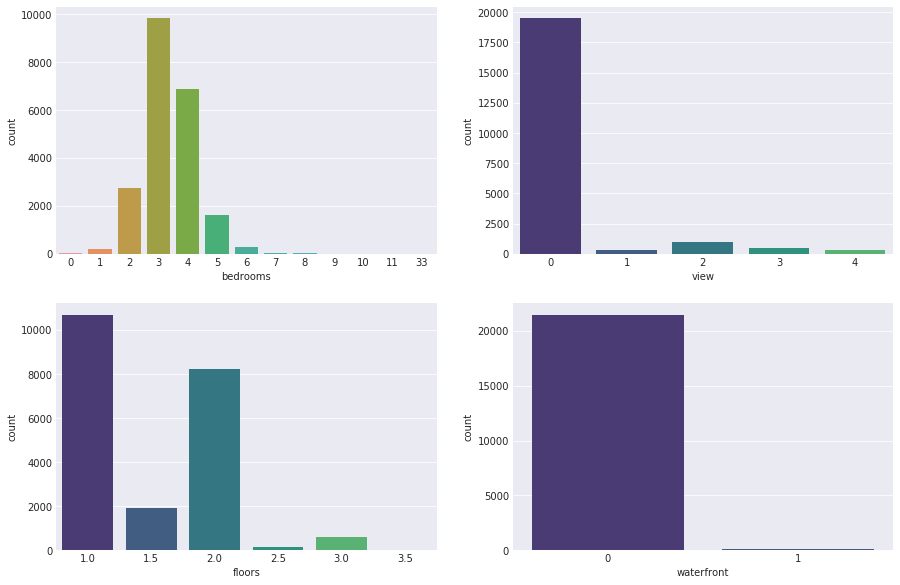

In [56]:
fig, axs = plt.subplots(nrows=2,ncols=2, figsize=(15,10))
sns.countplot(x='bedrooms', data=king_county_df_cleaned, ax=axs[0][0])
sns.countplot(x='view', data=king_county_df_cleaned, ax=axs[0][1])
sns.countplot(x='floors', data=king_county_df_cleaned, ax=axs[1][0])
sns.countplot(x='waterfront', data=king_county_df_cleaned, ax=axs[1][1])
plt.show()

# Price mean by number of floors and bedrooms.

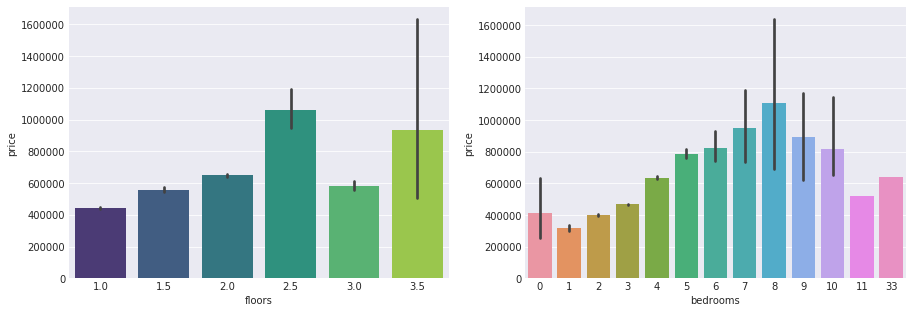

In [57]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.barplot(x='floors', y='price', data=king_county_df_cleaned, ax=axs[0])
sns.barplot(x='bedrooms', y='price', data=king_county_df_cleaned, ax=axs[1])
plt.show()

# Distribution of price by bedrooms and floors.

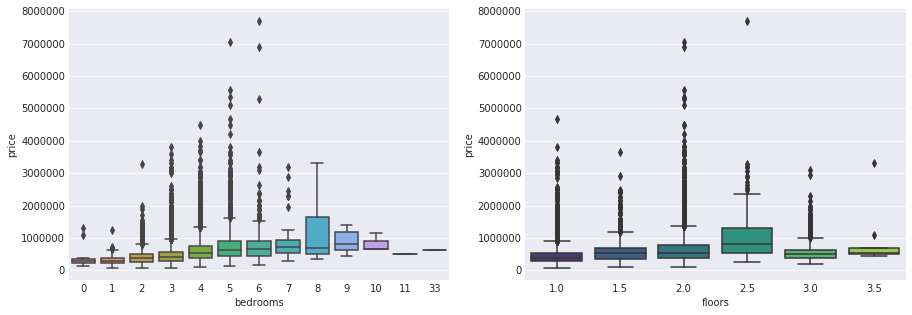

In [58]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.boxplot(x='bedrooms', y='price', data=king_county_df_cleaned, ax=axs[0])
sns.boxplot(x='floors', y='price', data=king_county_df_cleaned, ax=axs[1])
plt.show()

# Relationship between price & floors,grade,bedrooms and condition.

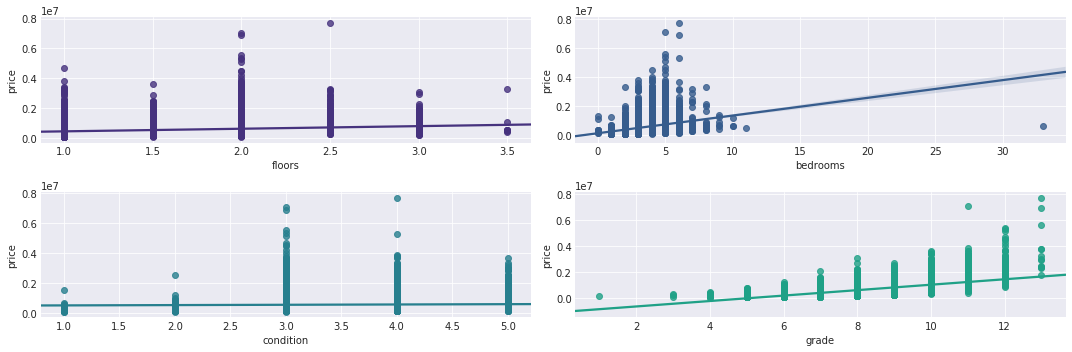

In [59]:
fig, axs = plt.subplots(2,2, figsize=(15,5))

sns.regplot(x='floors', y='price', data=king_county_df_cleaned, ax=axs[0][0])
sns.regplot(x='bedrooms', y='price', data=king_county_df_cleaned, ax=axs[0][1])
sns.regplot(x='condition', y='price', data=king_county_df_cleaned, ax=axs[1][0])
sns.regplot(x='grade', y='price', data=king_county_df_cleaned, ax=axs[1][1])

plt.tight_layout()
plt.show()

# Time series analysis of houses count built on specific year.

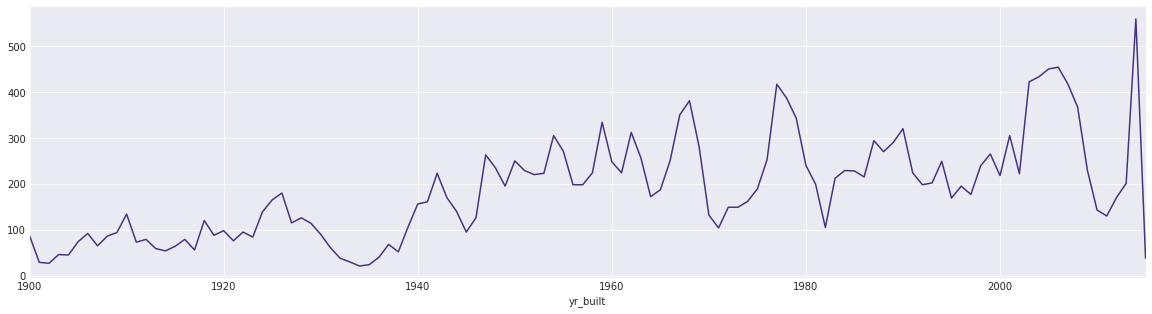

In [60]:
king_county_df_cleaned.groupby(king_county_df_cleaned.yr_built).size().plot(figsize=(20,5))

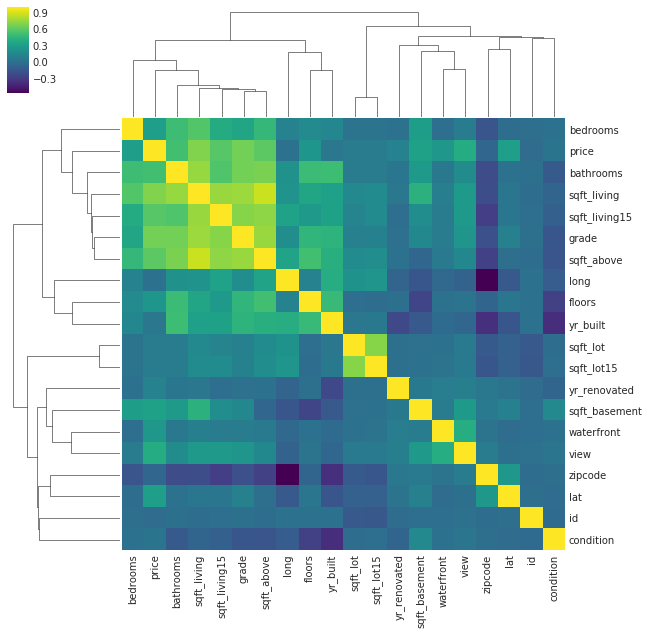

In [61]:
sns.clustermap(king_county_df.corr(), cmap='viridis')
plt.show()

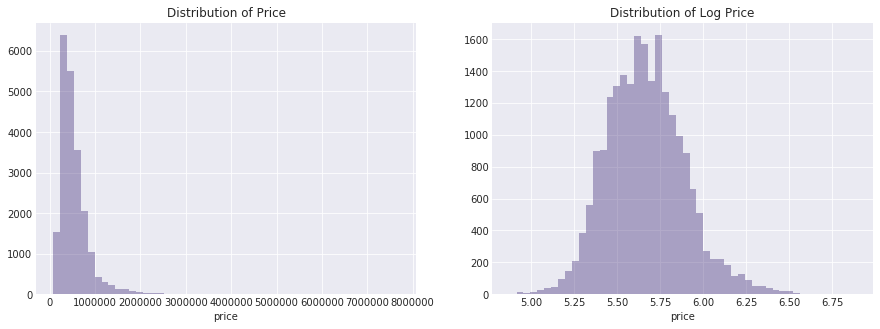

In [62]:
fig, axs = plt.subplots(1,2,figsize=(15,5))

axs[0].set_title('Distribution of Price')
sns.distplot(king_county_df.price, kde=False, ax=axs[0])

axs[1].set_title('Distribution of Log Price')
sns.distplot(np.log10(king_county_df.price), kde=False, ax=axs[1])

plt.show()

In [63]:
king_county_df_cleaned.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,zipcode
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,1340,5650,98178
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1690,7639,98125
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,2720,8062,98028
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,1360,5000,98136
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,1800,7503,98074


* Turn variables below into categorical values.

In [64]:
condition_dum = pd.get_dummies(king_county_df_cleaned.condition, prefix='condition')
year_dum = pd.get_dummies(king_county_df_cleaned.yr_built, prefix='yr_built')
bedrooms =  pd.get_dummies(king_county_df_cleaned.bedrooms, prefix='bedrooms')
zipcode =  pd.get_dummies(king_county_df_cleaned.zipcode, prefix='zipcode')
floors = pd.get_dummies(king_county_df_cleaned.floors, prefix='floors')

In [65]:
king_county_df_cleaned = king_county_df_cleaned.join(condition_dum).join(year_dum).join(zipcode).join(floors)

In [66]:
king_county_df_cleaned = king_county_df_cleaned.drop(['condition','yr_built','bedrooms','zipcode','floors'], axis=1)

In [67]:
king_county_df_cleaned['bias'] = 1

# Start fitting model.

In [68]:
X = king_county_df_cleaned.drop(['date','price'],axis=1)
y = np.log(king_county_df_cleaned['price'])

* Split into training set and test set.

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

* Instantiate linear regression estimator.

In [70]:
lm = LinearRegression()

* Fit a model.

In [71]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

* Make predictions.

In [72]:
preds = lm.predict(X_test)

* Check observed vs predicted.

Text(0.5,1,'Observed vs Predicted')

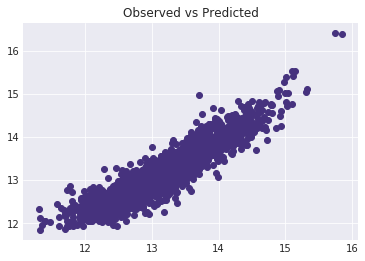

In [73]:
plt.scatter(y_test, preds)
plt.title('Observed vs Predicted')

* Distribution of the residuals.

Text(0.5,1,'Distribution of Residuals')

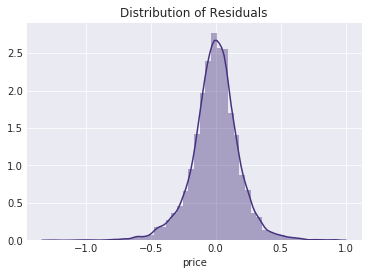

In [74]:
sns.distplot(y_test-preds)
plt.title('Distribution of Residuals')

* Model metrics.

In [75]:
print('MAE:',metrics.mean_absolute_error(y_test, preds))
print('MSE:',metrics.mean_squared_error(y_test, preds))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, preds)))

MAE: 0.135174307885
MSE: 0.0342449692332
RMSE: 0.18505396303


# Good overall model score.

In [76]:
print('R^2:', round(metrics.r2_score(y_test, preds),2))

R^2: 0.88


# Random Forest.

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
rf = RandomForestClassifier()

In [79]:
rf.fit(X_train,y_train)

ValueError: Unknown label type: 'continuous'